# Part II - Explanatory of Ford GoBike System Data
## by Shahnaza Tursunova

## Investigation Overview

- Is the bike share for all trip depends on weekdays?

- Does gender affect the duration of the ride in the weekdays?

- Is there any relationship between start time, gender and bike share?


## Dataset Overview and Executive Summary

Data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata_cleaned.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174689 entries, 0 to 174688
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   duration_sec             174689 non-null  int64 
 1   start_time               174689 non-null  object
 2   end_time                 174689 non-null  object
 3   start_station_name       174689 non-null  object
 4   end_station_name         174689 non-null  object
 5   bike_id                  174689 non-null  int64 
 6   user_type                174689 non-null  object
 7   member_birth_year        174689 non-null  int64 
 8   member_gender            174689 non-null  object
 9   bike_share_for_all_trip  174689 non-null  object
 10  member_age               174689 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 14.7+ MB


In [3]:
# correcting the column types
dtype= {'start_time': 'datetime64[ns]', 
        'end_time': 'datetime64[ns]',
        
        'user_type': 'category',
        'member_gender': 'category', 
        'bike_share_for_all_trip': 'category'}
df = df.astype(dtype)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174689 entries, 0 to 174688
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174689 non-null  int64         
 1   start_time               174689 non-null  datetime64[ns]
 2   end_time                 174689 non-null  datetime64[ns]
 3   start_station_name       174689 non-null  object        
 4   end_station_name         174689 non-null  object        
 5   bike_id                  174689 non-null  int64         
 6   user_type                174689 non-null  category      
 7   member_birth_year        174689 non-null  int64         
 8   member_gender            174689 non-null  category      
 9   bike_share_for_all_trip  174689 non-null  category      
 10  member_age               174689 non-null  int64         
dtypes: category(3), datetime64[ns](2), int64(4), object(2)
memory usage: 11.2+ MB


In [4]:
# small addition - add start_weekday and end_weekday columns
df['start_weekday']=df['start_time'].dt.day_name()
df['end_weekday']=df['end_time'].dt.day_name()
df['start_hour'] = df['start_time'].dt.hour
df.head(5)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_weekday,end_weekday,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,35,Thursday,Friday,17
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,47,Thursday,Friday,12
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,30,Thursday,Friday,17
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,45,Thursday,Friday,23
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,60,Thursday,Friday,23


In [5]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

## Is the bike share for all trip depends on weekdays?


In [18]:
# create plottable data 
# selecting columns to plot 
cols=['start_weekday', 'end_weekday', 'duration_sec', 'bike_share_for_all_trip']

plot_data = df[cols]

# transform the data
plot_data = plot_data.melt(id_vars=['duration_sec', 'bike_share_for_all_trip'], var_name='start-end', value_name='day')
plot_data.head(2)

,duration_sec,bike_share_for_all_trip,start-end,day
0,52185,No,start_weekday,Thursday
1,61854,No,start_weekday,Thursday


In [19]:
#Since there will be 2 almost same plot, let's make it in function
def plot_custom_data(data, x, y, hue, col, order, kind, ylabel, suptitle):
    g=sns.catplot(data=data, x=x, y=y, hue=hue, col=col, order=order, kind=kind);
    g.set_ylabels(ylabel, size=12)
    g.set_xlabels('')
    g.fig.subplots_adjust(top=0.9)
    g.fig.suptitle(suptitle, size=15);
    g.fig.set_size_inches(20, 10)

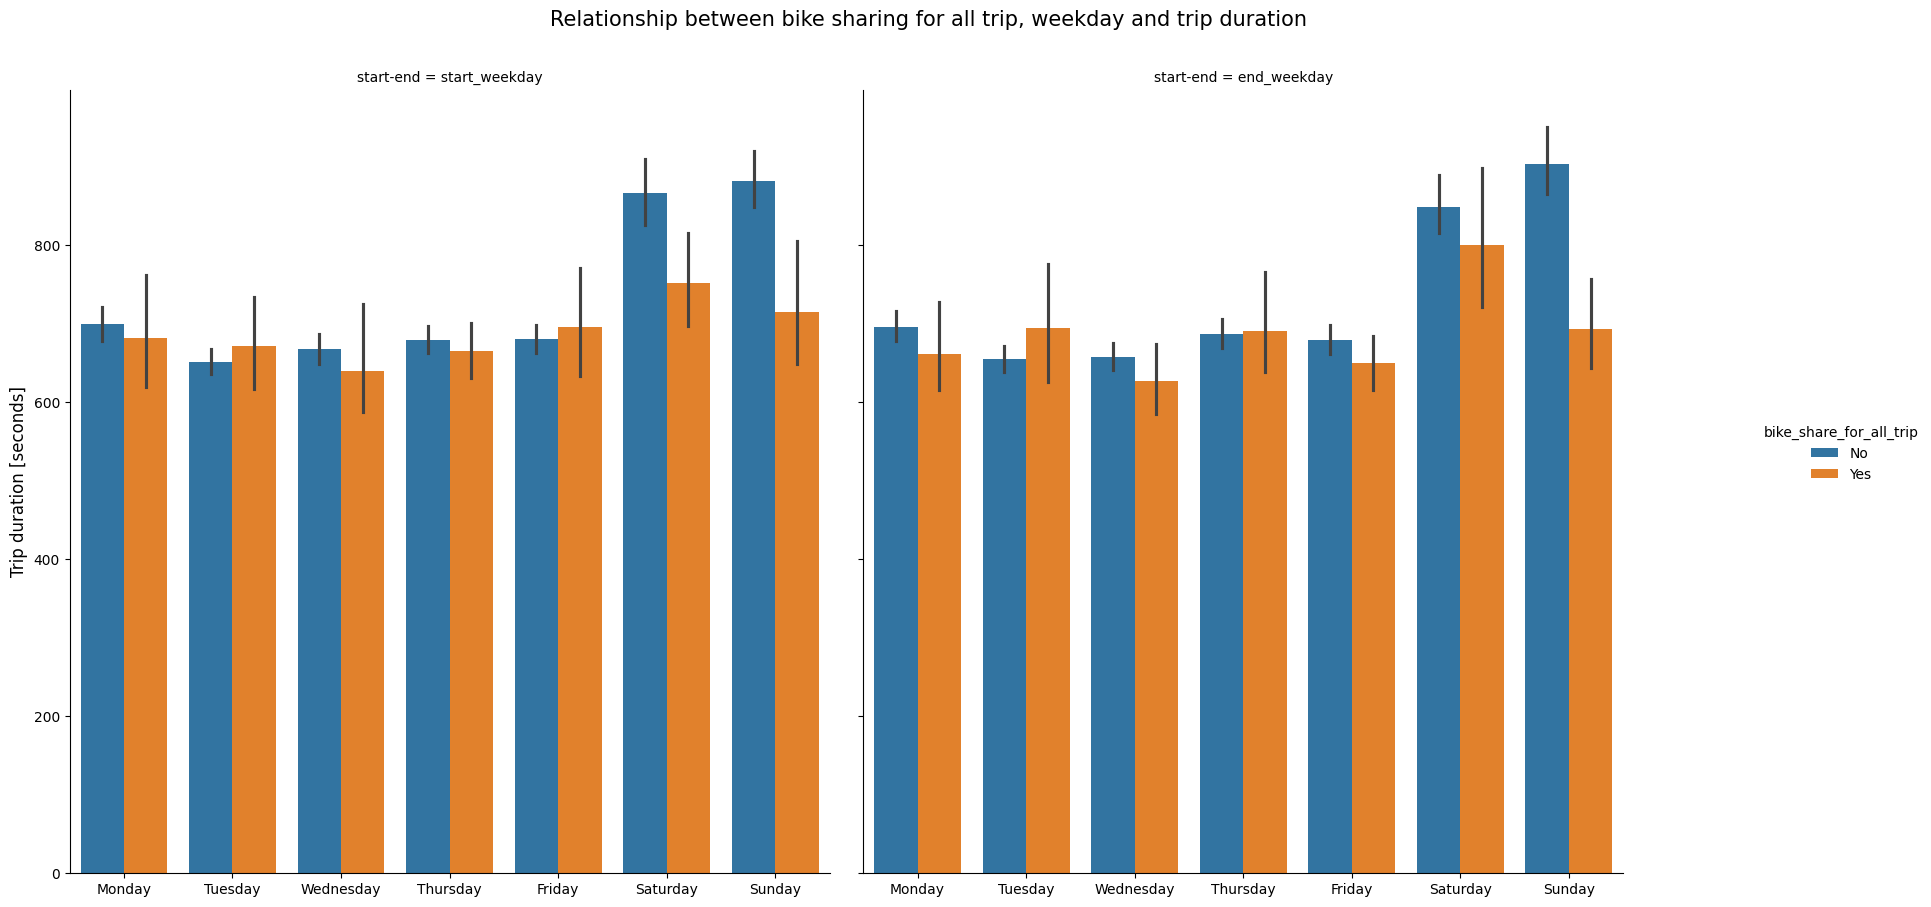

In [23]:
# plot the data for bike sharing for all trip, weekday and trip duration
plot_custom_data(
    data=plot_data, 
    x='day', 
    y='duration_sec', 
    hue='bike_share_for_all_trip', 
    col='start-end', 
    order=day_order, 
    kind='bar', 
    ylabel='Trip duration [seconds]', 
    suptitle='Relationship between bike sharing for all trip, weekday and trip duration')

_Finding:_ It is obvious, but interesting finding that on weekends users try to NOT share their bikes, and use it for more time. It can be easily observed by higher "bars" on Saturday and Sunday for start and end times of the usage. 

## Does gender affect the duration of the ride in the weekdays?


In [9]:
# selecting columns to plot 
cols=['start_weekday', 'end_weekday', 'duration_sec', 'member_gender']

# creating new data
plot_data = df[cols]

# Melting data
plot_data = plot_data.melt(id_vars=['duration_sec', 'member_gender'], var_name='start-end', value_name='day')
plot_data.head(2)

,duration_sec,member_gender,start-end,day
0,52185,Male,start_weekday,Thursday
1,61854,Male,start_weekday,Thursday


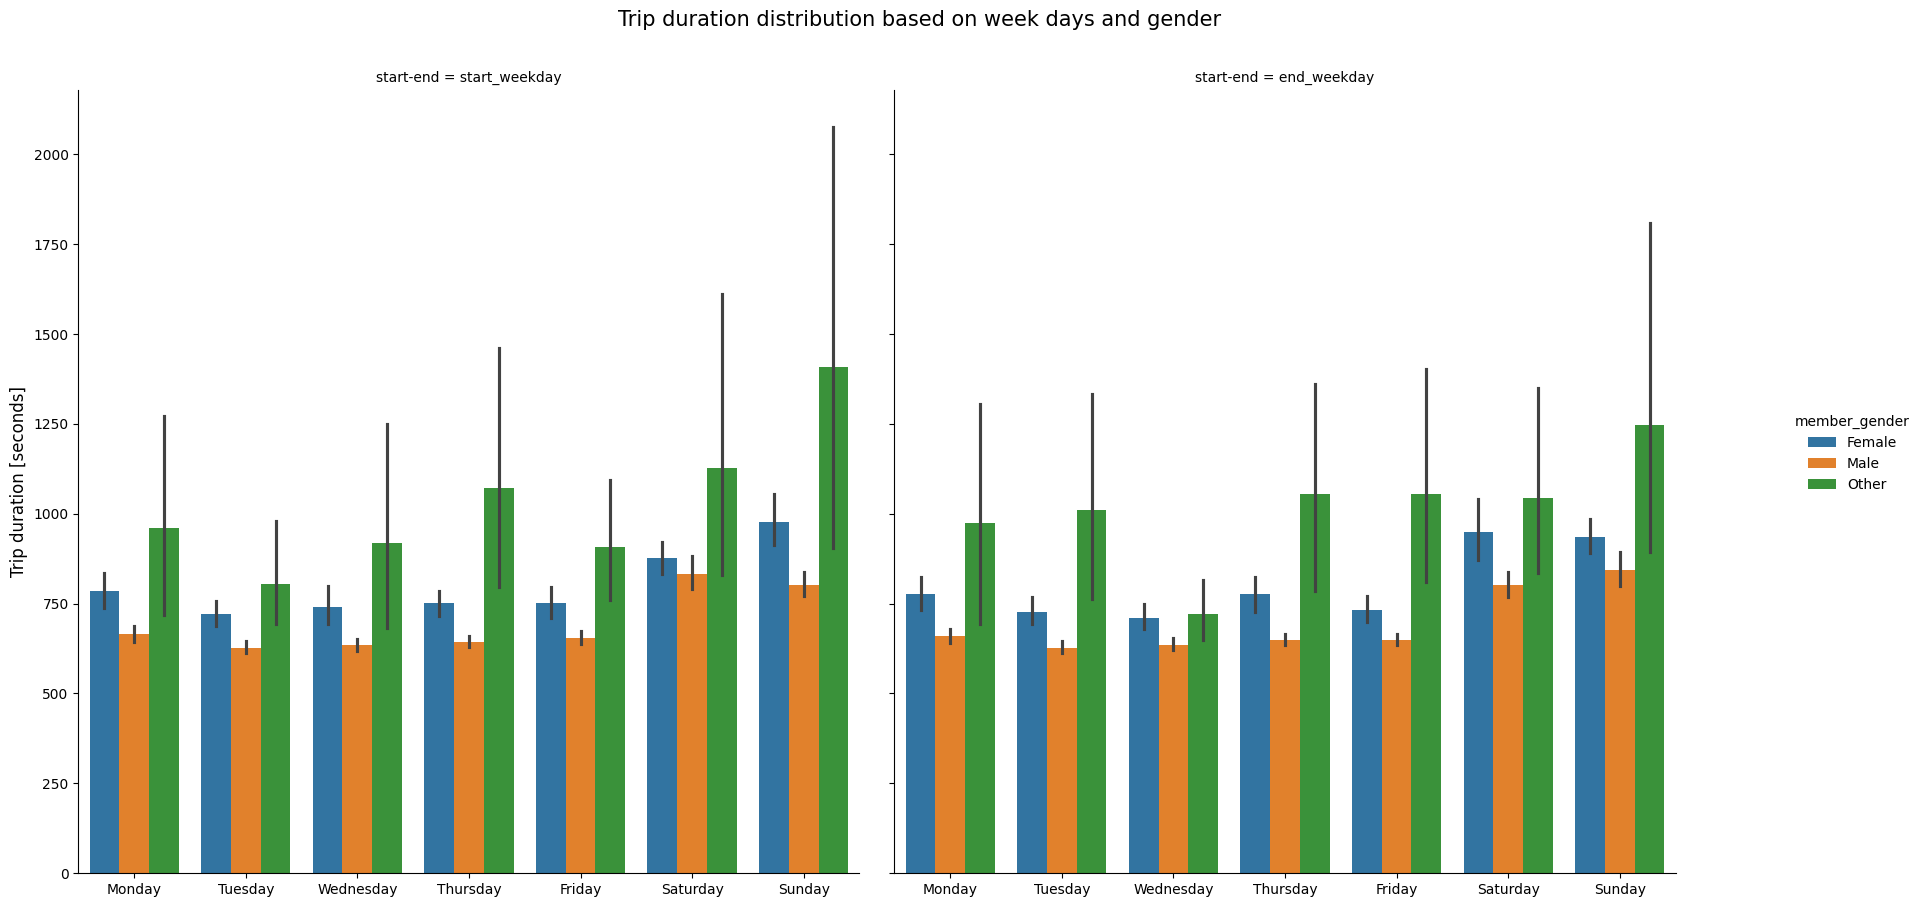

In [10]:
## Plotting
plot_custom_data(
    data=plot_data, 
    x='day', 
    y='duration_sec', 
    hue='member_gender', 
    col='start-end',
    order=day_order, 
    kind='bar', 
    ylabel='Trip duration [seconds]', 
    suptitle = 'Trip duration distribution based on week days and gender')


_Finding:_ All users use the bike more frequently and for longer duration on weekends, especially 'other' gender types!

## Is there any relationship between start time, gender and bike share?

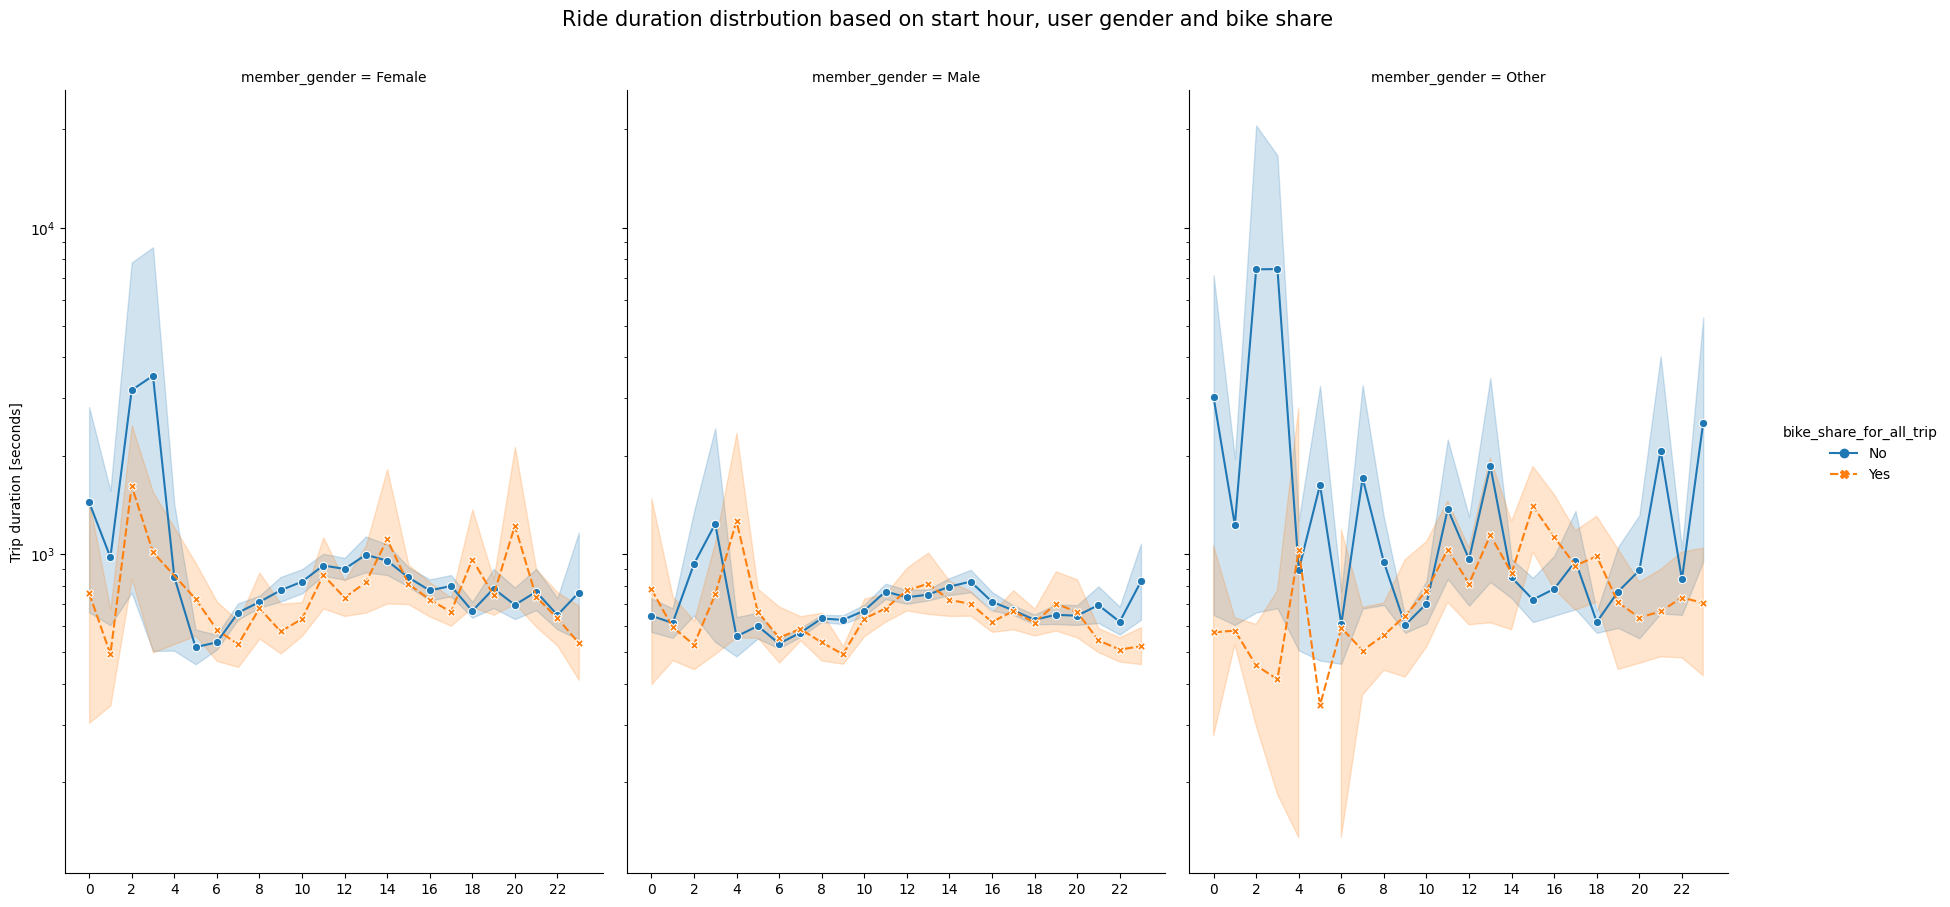

In [31]:
g=sns.relplot(
    data=df,     
    x='start_hour', 
    y='duration_sec', 
    col='member_gender',
    hue='bike_share_for_all_trip',     
    style='bike_share_for_all_trip',     
    kind='line',
    markers=True,
)
g.set_ylabels('Trip duration [seconds]')
g.set_xlabels('')

# set up xticks for hours and yscale to be logarithmic
g.set(xticks=[t for t in range(24) if t%2==0], yscale='log')
g.fig.subplots_adjust(top=0.9) 
g.fig.suptitle('Ride duration distrbution based on start hour, user gender and bike share', fontsize=15)
g.fig.set_size_inches(20,10);

_Finding:_ During the night time and early morning, users do not want to share bike for all trip. Especially, female users and other type of gender. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_II_notebook.html or pdf


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
